`RxnTools` is a custom package under active development for the purpose of 1) extracting stereochemistry-aware reaction templates from fully atom-mapped reactions and 2) enumerating stereochemistry-aware reactions using these extracted templates. This notebook covers some basic functions for extracting mapped bonds and atoms within the `reaction` module. All atom-mapped reactions are taken from Esther Heid's publication of the EnzymeMap database (https://pubs.rsc.org/en/content/articlehtml/2023/sc/d3sc02048g).

In [1]:
import json
from rxntools import reaction
from rdkit import Chem, RDLogger
from rdkit.Chem import AllChem

# Suppress RDKit warnings
RDLogger.DisableLog('rdApp.*')

Consider the fully atom-mapped alcohol dehydrogenase reaction involving the oxidation of ethanol to ethanal:

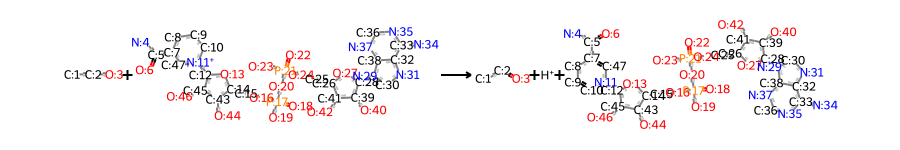

In [2]:
AllChem.ReactionFromSmarts('[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]1[cH:8][cH:9][cH:10][n+:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[cH:47]1>>[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[C:7]1=[CH:47][N:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[CH:10]=[CH:9][CH2:8]1')

We can instantiate an object of the `mapped_reaction` class with this fully-atom mapped SMARTS representation of the alcohol dehydrogenase reaction.

In [3]:
mapped_rxn = reaction.mapped_reaction(rxn_smarts = '[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]1[cH:8][cH:9][cH:10][n+:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[cH:47]1>>[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[C:7]1=[CH:47][N:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[CH:10]=[CH:9][CH2:8]1')

For the instantiate `mapped_rxn` object, the original reaction SMARTS can be accessed via the attribute `mapped_rxn.rxn_smarts`:

In [4]:
mapped_rxn.rxn_smarts

'[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]1[cH:8][cH:9][cH:10][n+:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[cH:47]1>>[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[C:7]1=[CH:47][N:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[CH:10]=[CH:9][CH2:8]1'

The first key method under the `mapped_reaction` class is the internal function `_get_mapped_bonds`. This takes an RDKit `Chem.rdchem.Mol` object corresponding to a sigle molecule as an input and returns the set of all mapped bonds within this molecule. Each element in this set is a tuple that corresponds to a mapped bond. This tuple inturn comprises three elements: 1) the starting atom index of a bond (an integer), 2) the ending atom index of a bond (an integer), and the bond type (single, double, aromatic, etc). This bond type is an `Chem.rdchem.BondType` data type.

In [5]:
atom_mapped_ethanol_SMARTS = '[CH3:1][CH2:2][OH:3]'
mol = Chem.MolFromSmarts(atom_mapped_ethanol_SMARTS)

mapped_rxn._get_mapped_bonds(mol)

{(1, 2, rdkit.Chem.rdchem.BondType.SINGLE),
 (2, 3, rdkit.Chem.rdchem.BondType.SINGLE)}

This is a static method so it can be accessed directly using the `mapped_reaction` class and outside of the instantiated `mapped_rxn` object' too

In [6]:
reaction.mapped_reaction._get_mapped_bonds(mol)

{(1, 2, rdkit.Chem.rdchem.BondType.SINGLE),
 (2, 3, rdkit.Chem.rdchem.BondType.SINGLE)}

The next key method under the `mapped_reaction` class is the internal function `_get_all_changed_atoms`. This takes the fully atom-mapped reaction from the object with which the `mapped_reaction` class was instantiated and returns 1) the atom indices of all transformed atoms, 2) the bond indices of all broken bonds on the left-hand-side of a reaction as well as 3) the bond indices of all formed bonds on the right-hand-side of a reaction. At the cost of some redundancy, there is another method, `get_all_changed_atoms`, that is similar to the internal function `get_all_changed_atoms` but with the added option of being able to exclude cofactors.

#### Example 1: Alcohol dehydrogenase oxidizing ethanol to ethanal with NAD(+)/ NADH

In [7]:
atom_mapped_ethanol_AdH_rxn_smarts = '[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]1[cH:8][cH:9][cH:10][n+:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[cH:47]1>>[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[C:7]1=[CH:47][N:11]([C@@H:12]2[O:13][C@H:14]([CH2:15][O:16][P:17](=[O:18])([OH:19])[O:20][P:21](=[O:22])([OH:23])[O:24][CH2:25][C@H:26]3[O:27][C@@H:28]([n:29]4[cH:30][n:31][c:32]5[c:33]([NH2:34])[n:35][cH:36][n:37][c:38]45)[C@H:39]([OH:40])[C@@H:41]3[OH:42])[C@@H:43]([OH:44])[C@H:45]2[OH:46])[CH:10]=[CH:9][CH2:8]1'


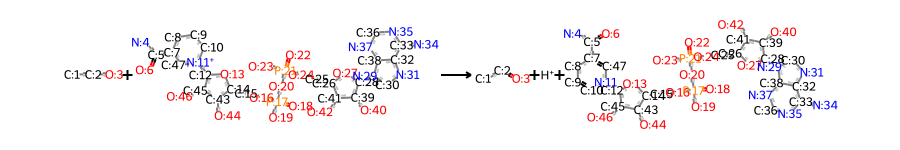

In [8]:
AllChem.ReactionFromSmarts(atom_mapped_ethanol_AdH_rxn_smarts)

In [9]:
mapped_rxn = reaction.mapped_reaction(rxn_smarts = atom_mapped_ethanol_AdH_rxn_smarts)

changed_atoms, broken_bonds, formed_bonds = mapped_rxn._get_all_changed_atoms()

The first output, `changed_atoms` is the set of atom indices of all atoms across the reaction that experience a change in bond order. In this example, the atom indices 2 and 3 correspond to the C-O bond within ethanol that gets oxidized to form the C=O bond within ethanal. Meanwhile, the atom indices 7,8,9,10,11, and 47 correspond to the aromatic bonds within the pyridine ring within NAD(+). This pyridine ring loses its aromaticity when NAD(+) is transformed to NADH.

In [10]:
changed_atoms

{2, 3, 7, 8, 9, 10, 11, 47}

The second output, `broken_bonds` is a set of tuples corresponding to all bonds on the left-hand-side of the reaction that were broken. Within this set of broken bonds, each tuple should have three elements. The first two elements of the tuple are integers corresponding to the start and end indices of each broken bond while the third element is the `Chem.rdchem.BondType` of the broken bond. Here, we can see that the C-O single bond in ethanol has been broken and the aromatic bonds within the pyridine ring of NAD(+) have also been broken.

In [11]:
broken_bonds

{(2, 3, rdkit.Chem.rdchem.BondType.SINGLE),
 (7, 8, rdkit.Chem.rdchem.BondType.AROMATIC),
 (8, 9, rdkit.Chem.rdchem.BondType.AROMATIC),
 (9, 10, rdkit.Chem.rdchem.BondType.AROMATIC),
 (10, 11, rdkit.Chem.rdchem.BondType.AROMATIC),
 (11, 47, rdkit.Chem.rdchem.BondType.AROMATIC),
 (47, 7, rdkit.Chem.rdchem.BondType.AROMATIC)}

The third and final output, `formed_bonds` is a set of tuples corresponding to all bonds on the right-hand-side of the reaction that were formed. Within this set of formed bonds, similar to the set of broken bonds, each tuple should have three elements. The first two elements of the tuple are integers corresponding to the start and end indices of each formed bond while the third element is the `Chem.rdchem.BondType` of the formed bond. Here, we can see that a C=O double bond has been formed in ethanal while the previous aromatic bonds within the pyridine ring of NAD(+) have taken on a new bond order in the formation NADH.

In [12]:
formed_bonds

{(2, 3, rdkit.Chem.rdchem.BondType.DOUBLE),
 (7, 47, rdkit.Chem.rdchem.BondType.DOUBLE),
 (8, 7, rdkit.Chem.rdchem.BondType.SINGLE),
 (9, 8, rdkit.Chem.rdchem.BondType.SINGLE),
 (10, 9, rdkit.Chem.rdchem.BondType.DOUBLE),
 (11, 10, rdkit.Chem.rdchem.BondType.SINGLE),
 (47, 11, rdkit.Chem.rdchem.BondType.SINGLE)}

As previously mentioned, the method `get_all_changed_atoms` has the added functionality of exlcuding cofactors provided in the cofactors list located under `../data/cofactors.json`. Since NAD(+) and NADH have been provided as cofactors in this list, the outputs `changed_atoms`, `broken_bonds`, and `formed_bonds` will only have information on ethanol and ethanal while excluding NAD(+) and NADH. The method `get_all_changed` atoms also has an additional `consider_stereo` argument. If set to True, the stereochemistry of molecules will also be checked prior to designating them as cofactors.

In [13]:
with open('../data/cofactors.json') as f:
    cofactors_dict = json.load(f)
cofactors_list = [cofactors_dict[key] for key in cofactors_dict.keys()]

In [14]:
changed_atoms, broken_bonds, formed_bonds = mapped_rxn.get_all_changed_atoms(include_cofactors = False,
                                                                             consider_stereo = True,
                                                                             cofactors_list = cofactors_list)

The output `changed_atoms` no longer comprises atom indices in NAD(+)/NADH

In [15]:
changed_atoms

{2, 3}

In a similar vein, the outputs `broken_bonds` and `formed_bonds` no longer carry information on the broken aromaticity of the pyridine ring in NAD(+)/ NADH and only comprise information on the broken C-O bond in ethanol and the formed C=O bond in ethanal.

In [16]:
broken_bonds

{(2, 3, rdkit.Chem.rdchem.BondType.SINGLE)}

In [17]:
formed_bonds

{(2, 3, rdkit.Chem.rdchem.BondType.DOUBLE)}

#### Example 2: Nitrilase reaction transforming mandelonitrile to benzaldehyde

In [18]:
nitrilase_rxn_smarts = '[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1>>[CH:3](=[O:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1.[N:1]#[CH:2]'

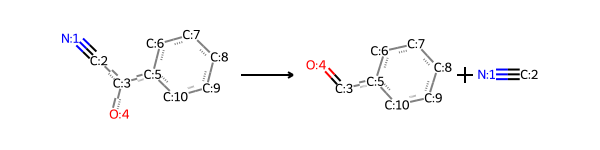

In [19]:
AllChem.ReactionFromSmarts(nitrilase_rxn_smarts)

In [20]:
mapped_rxn = reaction.mapped_reaction(rxn_smarts = nitrilase_rxn_smarts)

In [21]:
changed_atoms, broken_bonds, formed_bonds = mapped_rxn._get_all_changed_atoms()

In this nitrilase reaction, the C2-C3 bond is broken to form a nitrile and the C3-O4 bond is oxidized from a single bond to a double bond so we expect the set of all changed atoms to comprise atom indices 2, 3, and 4.

In [22]:
changed_atoms

{2, 3, 4}

In [23]:
broken_bonds

{(2, 3, rdkit.Chem.rdchem.BondType.SINGLE),
 (3, 4, rdkit.Chem.rdchem.BondType.SINGLE)}

In [24]:
formed_bonds

{(3, 4, rdkit.Chem.rdchem.BondType.DOUBLE)}

Since there are no cofactor atoms on the left-hand-side of this reaction, using the method `get_all_changed_atoms` will give the same result.

In [25]:
mapped_rxn = reaction.mapped_reaction(rxn_smarts = '[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1>>[CH:3](=[O:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1.[N:1]#[CH:2]')

changed_atoms, broken_bonds, formed_bonds = mapped_rxn.get_all_changed_atoms(include_cofactors = True,
                                                                             consider_stereo = True,
                                                                             cofactors_list = cofactors_list)

In [26]:
changed_atoms

{2, 3, 4}

In [27]:
broken_bonds

{(2, 3, rdkit.Chem.rdchem.BondType.SINGLE),
 (3, 4, rdkit.Chem.rdchem.BondType.SINGLE)}

In [28]:
formed_bonds

{(3, 4, rdkit.Chem.rdchem.BondType.DOUBLE)}

#### Example 3: Decarboxylation reaction

In [30]:
decarboxylation_smarts = '[CH3:1][CH:2]=[C:3]1[CH2:4][N:5]2[C@H:6]3[CH2:7][c:8]4[c:9]([nH:10][c:11]5[cH:12][cH:13][cH:14][cH:15][c:16]45)[C@@H:17]2[CH2:18][C@H:19]1[C@@:20]3([CH:21]=[O:22])[C:23](=[O:24])[O:25][CH3:26].[OH2:27]>>[C:23](=[O:24])=[O:27].[CH3:1][CH:2]=[C:3]1[CH2:4][N:5]2[C@H:6]3[CH2:7][c:8]4[c:9]([nH:10][c:11]5[cH:12][cH:13][cH:14][cH:15][c:16]45)[C@@H:17]2[CH2:18][C@H:19]1[C@@H:20]3[CH:21]=[O:22].[OH:25][CH3:26]'


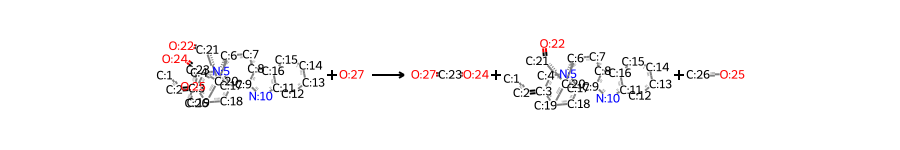

In [31]:
AllChem.ReactionFromSmarts(decarboxylation_smarts)

In [32]:
changed_atoms, broken_bonds, formed_bonds = mapped_rxn._get_all_changed_atoms()

In [33]:
changed_atoms

{2, 3, 4}

In [34]:
broken_bonds

{(2, 3, rdkit.Chem.rdchem.BondType.SINGLE),
 (3, 4, rdkit.Chem.rdchem.BondType.SINGLE)}

In [35]:
formed_bonds

{(3, 4, rdkit.Chem.rdchem.BondType.DOUBLE)}